# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [66,75,183]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9,1534,7417,175,3468,27
1,20398,1137,3,4407,3,975
2,36847,43950,20170,36534,239,47943


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In [4]:
display(samples - data.mean().round())
display(samples - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-11991,-4262,-534,-2897,587,-1498
1,8398,-4659,-7948,1335,-2878,-550
2,24847,38154,12219,33462,-2642,46418


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-8495,-2093,2661,-1351,2652,-939
1,11894,-2490,-4753,2881,-813,9
2,28343,40323,15414,35008,-577,46977


**Answer:**

The data judging by the differences between the median and the mean is heavily skewed.

- **Customer 0:** This customer has below mean and median Fresh, Milk, Frozen and Delicatessen. Above mean and median in Detergent_Paper.

- **Customer 1:** This customer has below mean and median Milk, Grocery, Detergents_Paper. Above mean and median in Fresh.

- **Customer 0:** This customer has above mean and median Fresh, Milk, Groacery, Frozen, Delicatessen. Below mean and median in Detergents_Paper.

*Judging from the magnitudes of numbers, Customer 2 appers to be a very big client, regadless of class. Customers 0 and 1 have mixed traits.*

Based on this my guesses for what kind of establishment the 3 samples represent are the following:

- **Customer 0:** A small hotel (no prepared food 'Fresh', breakfast included, Detergent_Paper for cleaning and management). 

- **Customer 1:** A restuarant (prepares 'Fresh' food) or small market ('Fresh' and 'Frozen').

- **Customer 2:** A huge retail store or supermarket (Big numbers in all but Detergent_Paper, not for sale but just internal use).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

scores_dict = {'Fresh': 0., 'Milk': 0., 'Grocery': 0., 'Frozen': 0., 'Detergents_Paper': 0., 'Delicatessen': 0.}

for i in data.columns.values:
    new_data = data.drop(labels=i,axis=1)
    target = data[i]
    X_train, X_test, y_train, y_test = train_test_split(new_data,target,test_size=0.25,random_state=0)
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train,y_train)
    score = regressor.score(X_test,y_test)
    scores_dict[i] = score
    
for key in scores_dict:
    print "For {0}, R^2 score of: {1:f}".format(key,scores_dict[key])
    
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# TODO: Split the data into training and testing sets using the given feature as the target
# TODO: Create a decision tree regressor and fit it to the training set
# TODO: Report the score of the prediction using the testing set

For Grocery, R^2 score of: 0.602802
For Frozen, R^2 score of: 0.253973
For Delicatessen, R^2 score of: -11.663687
For Detergents_Paper, R^2 score of: 0.728655
For Fresh, R^2 score of: -0.252470
For Milk, R^2 score of: 0.365725


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

I looked at all the features, Fresh and Delicatessen had negative R<sup>2</sup> (the model failed to fit the data). In increasing other of prediction score where Frozen, Milk, Grocery and Detergents Paper.

Higher R<sup>2</sup> scores mean it can be accurately predicted the amount spent in that feature based on the rest of them, that is, it can be somehow deduced from one or more of the other features. It can be left aside and inferred from the rest of the data and identify customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

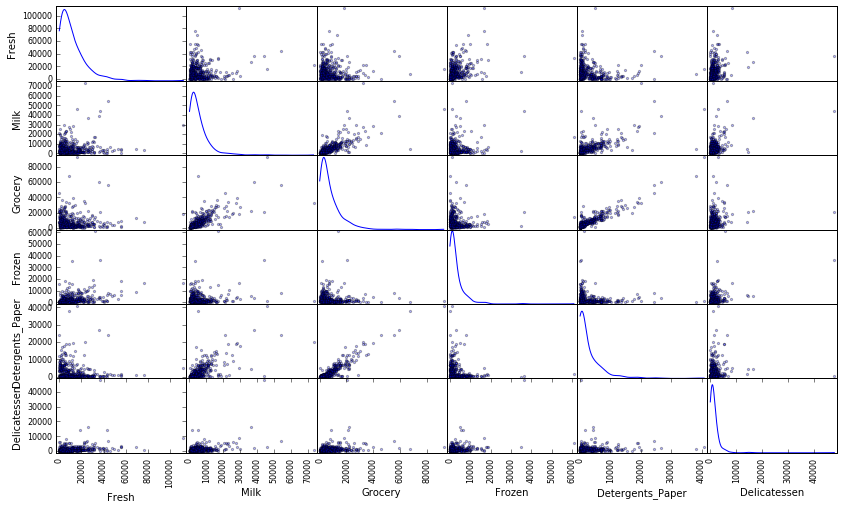

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

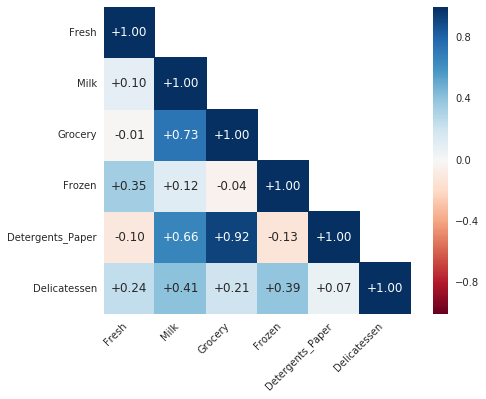

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='RdBu', fmt='+.2f')
    plt.xticks(rotation=45, ha='right');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

There are indeed pairs of features that exhibit correlation:

- **Grocery & Milk (0.728335)**
- **Grocery and Detergent Paper (0.924641)**
- **Milk and Detergent Paper (0.661816)** 

In the plot we can appreciate a sort of linear relationship between these pairs.

Data distribution for all features is positively skewed, that is: *The right tail is longer; the mass of the distribution is concentrated on the left of the figure.* Most points lie on the left of the curve.

Grocery, Milk and Detergent Paper play along with each other, when you see one of them you would expect the rest. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

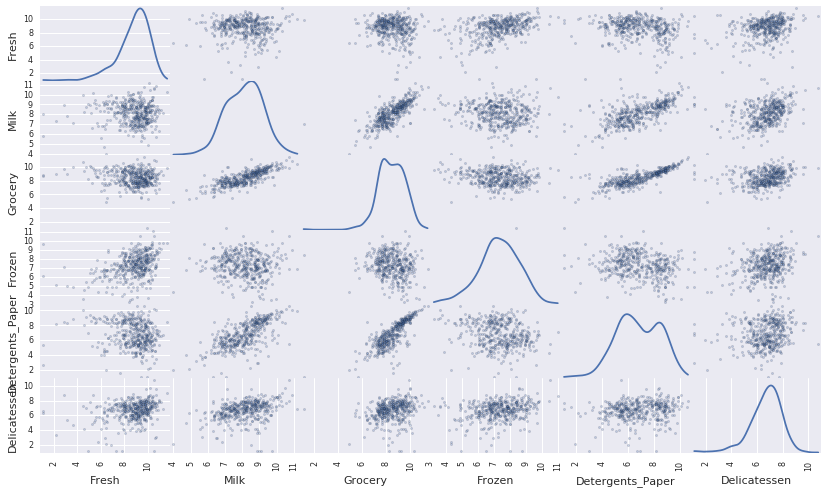

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
1,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
2,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# For each feature find the data points with extreme high or low values
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [] 
tot = 0

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5

    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outl = ~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))
    print "Outlier below {0:f} and over {1:f}".format((Q1-step),(Q3+step))
    print "{0:d} outliers".format(sum(outl))
    tot += sum(outl)
    display(log_data[outl])
    temp = np.where(outl)
    outliers.append(temp[0].tolist())

Data points considered outliers for the feature 'Fresh':
Outlier below 5.514551 and over 12.270572
16 outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
Outlier below 5.016733 and over 11.198728
4 outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
Outlier below 5.275760 and over 11.672710
2 outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
Outlier below 4.260350 and over 10.525224
10 outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
Outlier below 1.458743 and over 12.363699
2 outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
Outlier below 3.769594 and over 9.749009
14 outliers


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


(2640, 2)


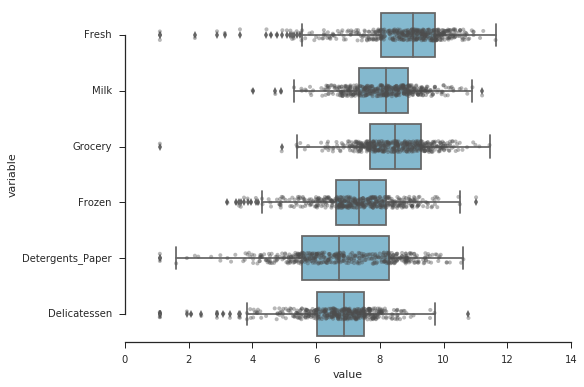

In [11]:
# create "melted" dataframe
df = pd.DataFrame(columns=['variable', 'value'])
for col in log_data.columns:
    df = df.append(pd.melt(log_data, value_vars=[col]))
print df.shape

# create the boxplot with data points overlay
sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(8,6))
sns.boxplot(x="value", y="variable", data=df, color="c")
sns.stripplot(x="value", y="variable", data=df, jitter=True, 
    size=4, alpha=.4, color=".3", linewidth=0)
sns.despine(trim=True)

In [12]:
outliers = sorted([item for sublists in outliers for item in sublists])
ps = pd.Series([i for i in outliers])
counts = ps.value_counts()
print "Repeated outliers"
print counts[counts>1]
print "Total outliers {0:d}".format(tot)
outliers = list(set(outliers))

# Remove the outliers, if any were specified
other_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
good_data = log_data

Repeated outliers
154    3
128    2
65     2
66     2
75     2
dtype: int64
Total outliers 48


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes there are many data points for more than 1 feature as outlier, particularly:

|  DP  | #  |  Outliers                                 |
|------|----|-------------------------------------------|
| 154  | 3  | (Low Milk, Low Grocery, Low Delicatessen) |
| 128  | 2  | (Low Fresh, Low Delicatessen)             |
| 65   | 2  | (Low Fresh, Low Frozen)                   |
| 66   | 2  | (Low Fresh, Low Delicatessen)             |
| 75   | 2  | (Low Detergents Paper, Low Grocery)       |

I did not remove any data points:

- I don't have evidence to think there is an error in the data (one reason to remove a data point)
- There are 42 different outliers which is about 10% of the total data, a big percentage.
- We may have two (or more) clusters of types of "Customers", and what is an outlier for a particular kind of establishment may not be for another, if data is unbalanced we may dismiss "good data" that just belongs to another "cluster".
- Data points with 2+ feature outliers all fall in the low region, which may be small businesses or altogether different businesses.
- We do not know the features (Channel and Region), that might have shown more insight on the data (or not).

However, KMeans can be sensitive to outliers as it is trying to minimize the sum of squares of all the data points, and outliers (points that are very far away), will have big sum of squares potentially displacing the calculated center of the cluster towards it and influencing the clustering as a whole. [1](http://stackoverflow.com/questions/13989419/removing-outliers-from-a-k-mean-cluster)

I'll proceed by looking at the influence of leaving/removing the outliers.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

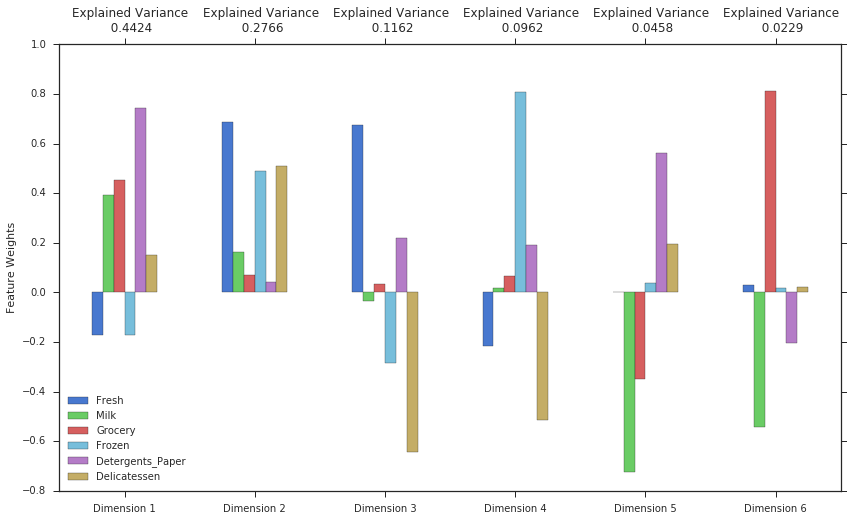

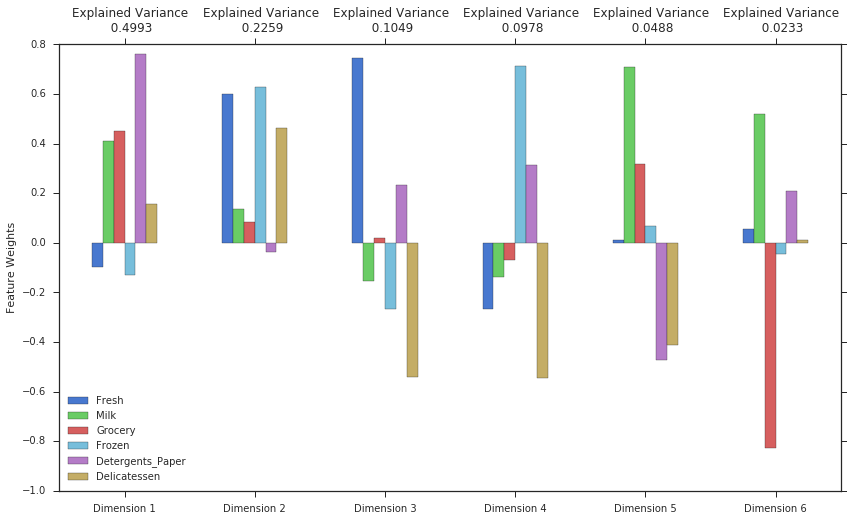

In [13]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
# With all data
pca_results = rs.pca_results(good_data,pca)


# Other data, data with all the detected outliers removed
pca2 = PCA(n_components=6)
pca2.fit(other_data)

# Generate PCA results plot
#With all outliers removed from data
pca_results2 = rs.pca_results(other_data,pca2)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

- 1<sup>st</sup> Principal component: **0.4424**
- 2<sup>nd</sup> Principal component: **0.2766**
- 3<sup>rd</sup> Principal component: **0.1162**
- 4<sup>th</sup> Principal component: **0.0962**
- First 2 Total: **0.7190**
- First 4 Total: **0.9314**

*"Interpretation of the principal components is based on finding which variables are most strongly correlated with each component, i.e., which of these numbers are large in magnitude, the farthest from zero in either positive or negative direction. Which numbers we consider to be large or small is of course is a subjective decision."* [2](https://onlinecourses.science.psu.edu/stat505/node/54)

**PCA:**
- 1<sup>st</sup> component shows a large positive weight on Detergents_Paper, moderately positive weights on Grocery, and Milk and a small positive weight on Delicatessen. Fresh and Frozen show small negative weights. This may reveal which customers buy a lot of Detergent Paper may also buy Grocery, Milk and Delicatessen, but not so much Fresh or Frozen. On the other side, Customers buying Fresh and or Frozen may not spend much on Detergents and Paper.


- 2<sup>nd</sup> component shows a large positive weight on Fresh as well as relevant positive weights on Delicatessen and Frozen, with small weights on the rest. This may reveal customers that buy a lot of Fresh, also buy good amouns of Frozen and Delicatessen. This pattern might represent overall spending on Food.  


- 3<sup>rd</sup> component shows a large positive weight on Fresh with a smaller positive weight on Detergents_Paper. It also shwos a large negative weight on Delicatessen with smaller negative weights on Frozen and Milk. This might reveal customers that buy a lot of Fresh and some Detergent Paper but very little on Delicatessen and Frozen. This pattern my represent day to day necessities in oposition to items that will not be immediately used.


- 4<sup>th</sup> component shows a large positive weight on Frozen and a moderate positvie weight on Detergents_Paper, with negative weights on the rest particuarly Delicatessen and Fresh. This might reveal customers that spend heavily in Frozen and somewhat in Detergents Paper spend very little in Delicatessen or Fresh and viceversa.

*"A principal component with feature weights that have opposite directions can reveal how customers buy more in one category while they buy less in the other category — for example, there are customers with a large positive value for the 3rd component that buy a lot of the positive-weighted feature(s) but not much of the negative-weighted feature(s). There are also customers that have a large negative value that buy very little of the positive-weighted feature(s) while buying a lot of the negative-weighted feature(s)."*

**Complete Dataset vs Dataset without outliers**
- First 3 components remain very similar in the shape of the plots and the sign of the weights with slight changes in the variance explained and weights of them.
- Changes start more evidently with the Fourth and particularly evident with Fifth and Sixth, where the weights have complete reversals in sign.

However if we are using the first 2 components which are very similar between them in both plots, one explains 0.7190 of the variance of the data whereas the other is 0.7252.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.9212,-7.2733,-1.2808,1.6833,0.4322,0.2275
1,-8.3665,0.5353,-1.0888,-1.0634,0.2159,-4.1768
2,0.4585,5.3459,-2.6856,-0.0173,-2.1850,0.2688


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

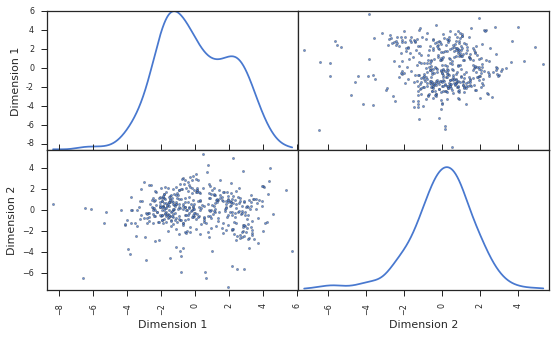

In [16]:
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (9,5), diagonal = 'kde');

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.9212,-7.2733
1,-8.3665,0.5353
2,0.4585,5.3459


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means**
- We guess a number of clusters, K clusters whose centers can be assined randomly when starting. For a given datapoint it will assign a certain cluster based on the proximity to the cluster center, and in doing so it will do it with absolute certainty (Hard assignment). It assumes symmetrical spherical shapes.
- Is faster and more scalable. 
- Can be considered a special case of GMM with equal covariance per cluster.
- Main parameter is number of clusters.
- General purpose.
- Estimation parameter is distance from center.

**GMM**
- Supposes a Gaussian distribution of points, that means that each point has a certain probability to belong to a certain distribution (Soft assignment). It assumes elliptical shapes.
- Slower due to using information about the data distribution — e.g., probabilities of points belonging to clusters.
- Many main parameters like: Number of clusters, covariance type, min covariance.
- Good for density estimation.
- Estimation parameter is distance (Mahalanobis) from center.

Whereas for a 2 cluster classification, K Means will say of a data point it is "red", GMM will say "red 61%, green 39%" for example.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# TODO: Predict the cluster for each data point
# TODO: Find the cluster centers
# TODO: Predict the cluster for each transformed sample data point
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

num_clusters = [2,3,4,5,6]

print "For KMeans silhoutte' scores"
for n_clusters in num_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels = clusterer.fit_predict(reduced_data)
    preds = clusterer.predict(reduced_data)
    sample_preds = clusterer.predict(pca_samples)
    silhouette_avg = silhouette_score(reduced_data,preds)
    print "{0:d} clusters, avg. silhoutte score: {1:2f}".format(n_clusters,silhouette_avg)

print '\n'
print "For GMM silhouette' scores"
for n_clusters in num_clusters:
    clusterer2 = GMM(n_components=n_clusters,random_state=0,covariance_type='full',min_covar=0.001)
    cluster_labels2 = clusterer2.fit_predict(reduced_data)
    preds2 = clusterer2.predict(reduced_data)
    sample_preds2 = clusterer2.predict(pca_samples)
    silhouette_avg = silhouette_score(reduced_data,preds2)
    print "{0:d} clusters, avg. silhoutte score: {1:2f}".format(n_clusters,silhouette_avg)    

    
#Highest is 2 clusters
clusterer = KMeans(n_clusters=2,random_state=0)
cluster_labels = clusterer.fit_predict(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
silhouette_avg = silhouette_score(reduced_data,preds)
print '\n'
print "Both cases best clustering was with 2 clusters"

For KMeans silhoutte' scores
2 clusters, avg. silhoutte score: 0.419166
3 clusters, avg. silhoutte score: 0.393679
4 clusters, avg. silhoutte score: 0.330230
5 clusters, avg. silhoutte score: 0.343875
6 clusters, avg. silhoutte score: 0.360171


For GMM silhouette' scores
2 clusters, avg. silhoutte score: 0.398029
3 clusters, avg. silhoutte score: 0.386282
4 clusters, avg. silhoutte score: 0.350543
5 clusters, avg. silhoutte score: 0.220674
6 clusters, avg. silhoutte score: 0.295425


Both cases best clustering was with 2 clusters


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

The best silhoutte score was for **2** clusters with **0.419166** for KMeans.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

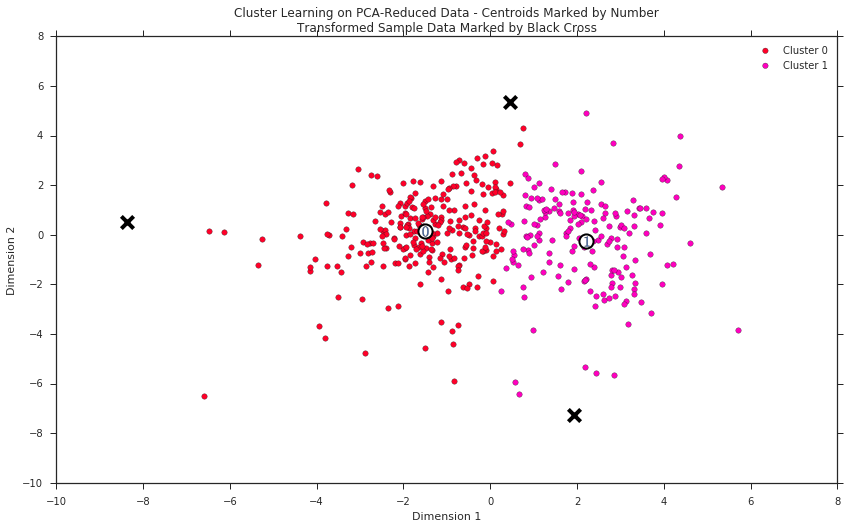

In [19]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8994,1909,2366,2081,290,681
Segment 1,3570,7749,12463,900,4567,966


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [27]:
display(true_centers - data.mean().round())
display(true_centers - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3006,-3887,-5585,-991,-2591,-844
Segment 1,-8430,1953,4512,-2172,1686,-559


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,490,-1718,-2390,555,-526,-285
Segment 1,-4934,4122,7707,-626,3751,0


**Answer:**

Cluster 0 Center: This is the left side clusters in the plot, center [PCA1 = -1.5, PCA2 = 0.16]. The horizontal axis of the plot belongs to PCA 1, which had high weights on **Detergent_Paper, Grocery and Milk.** We should expect the left side to be **low** in this traits.

Cluster 1 Center: This is the right side cluster in the plot, center [PCA1 = 2.21, PCA2 = -0.24]. This cluster conversely should have **high** values in **Detergent_Paper, Grocery and Milk.**

With this in mind, the customers from **Cluster 1** should be those with high demand of Detergent_Paper, Milk and Grocery. This could be a **supermarket, retailer or grocery stores.**

**Cluster 0** in the other hand with low demands in this features but **high** in **Fresh and Frozen**, should belong **restaurants or hospitality businesses**.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [50]:
# Display the predictions
display(log_samples - log_data.mean().round())

for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-6.802775,-0.664366,0.911530,-1.835214,1.151333,-3.704163
1,0.923192,-0.963852,-6.901388,1.390949,-5.901388,-0.117563
2,1.514529,2.690808,1.911952,3.505999,-1.523536,3.777768


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

For sample 0, the values of Detergents_Paper and Grocery are above average and mimic Cluster 1 in those categories. It has also below average values on Fresh and Frozen, as is too expected from Cluster 1. The predicted cluster seems to be consistent with the sample. A below average milk however seems unlike Cluster 1.

For sample 1, the values of Detergents_Paper, Grocery and Milk are below average, and mimic Cluster 0 in those categories. It has also above average values on Fresh and Frozen, as is too expected from Cluster 0. The predicted cluster seems to be consistent with the sample.

For sample 2, the value of Detergents_Paper mimics Cluster 0. It has also above average values on Fresh and Frozen, as is too expected from Cluster 0. However it scores high in Milk and Grocery unlike what is expected from cluster 0, so it is a tough call, nevertheless the predicted cluster seems to be consistent with the sample.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

A/B testing (sometimes called split testing) is comparing 2 versions of something to see how the change of a controlled variable affects the outcome of the test.

There are 2 cases: A or control version and B or variation version.

- The control "A" version would be the current delivery schedule of 5 days a week.
- The variation "B" version would be the new 3 days a week delivery schedule.

In A/B testing and for scientific hypothesis as a whole, we suppose there will be no change, and then with statistically evidence we try to prove that wrong, if we succeed then a change can be addressed.

- Null Hypothesis (H0), this hypothesis states that there would be no change in the customer reaction.

- Alternative Hypothesis (H1) this hypothesis states that there will be change in the customer reaction.

For H1 is important to specify if we only care for a difference (double-tail test) or if we expect the difference to be exclusively bigger than or smaller than our target. In this particular case, it is stated that we only care if they react positively, so it is a one tail test.

To perform an A/B test it is necesarry, to randomly sample the entire population and test it with either of the two groups.

Then it is necessary to register the reaction of the customers tested. Knowing which segment each reaction belongs to we create a distribution for each one. If there is statistically significant evidence that group "B" is different than group "A" then reject the Null Hypothesis.

To compare the distributions, that is to check if there is signidicant statistical evidence we can perform T-Tests (Student's or Welch's) or Z tests depending on the characteristicas of the distributions and our assumptions of them.

An scenario for the wholesale distributor might be as follows.
- Performs A/B tests as described

From the data he might observe that:
- There is statistical evidence to suggest that customers from the HoReCa segment do not react positively to the change. (Fail to reject H0)
- There is statistical evidence to suggest that customers from the Retail segment react positively to the change. (Reject H0)

According to this he might change the schedule for the Retail segment and leave it as it is for the HoReCa segment.

I choose the previous scenario (might not be the real one) because:

Change in delivery times can have an impact on time and space. 

- **Time:** Most of the items are perishable, or have an expiration day, that impacts harder to the Fresh, then Milk, Groceries & Delicatessen, and very little to Detergent_Paper. 

- **Space:** With fewer scheduled deliveries and the same demand, more items will be delivered each time, more than are normally used day by day. There might be the need of warehouse to store them, with the need of a controlled environment (temperature, humidity). This might impact more the Food products and less the Detergent_Paper.

For these reason I believe it could have a **negative impact** on **HoReCa** and no change should be issued with them.

For **Retail** however, it is very posible that they already have the necessary facilities to store the extra products per day, and fewer deliveries might indeed be more efficient to them, **positive impact**.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We have currently inferred customer segments from data, and identified their common traits. We have created **2 clusters** in our data, and learned to classify them according to their principal components, we used **2 principal components** that explain about **72%** of data variation.

In the same way we assigned a cluster (or customer segment) for the sample points, we can use the estimates, process them with PCA and assign them to a segment.

Having ourselves created "target" labels for our clusters we created a "supervised model", where the clusters have a label and in such way, we could check the accuracy of it by assigning as previously discussed a label and then, if we know the actual segment of the customers see if we were accurate or not.

If we did know the data labels (as I picked into the next plot), this would be a supervised learning problem and many other techniques would be at our dispossal.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

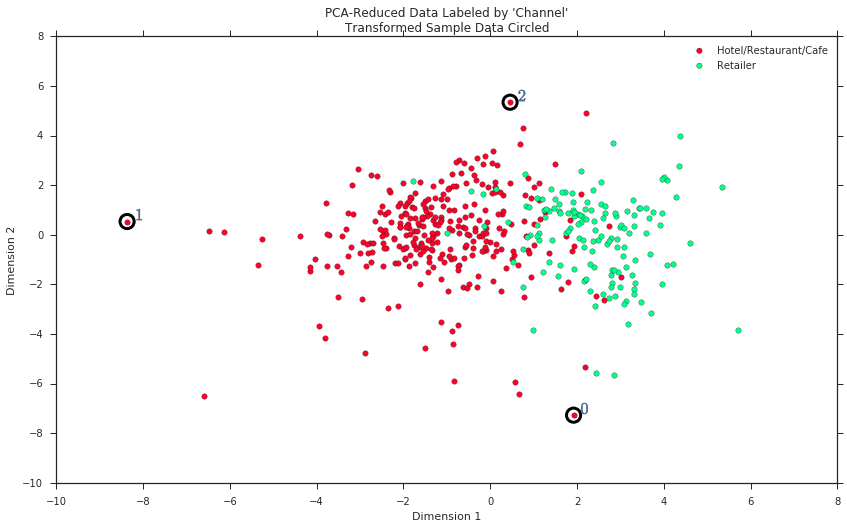

In [74]:
# Display the clustering results based on 'Channel' data
outliers=[]
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

Confusion Matrix Actual Channel vs Segment Prediction
Overall accuracy: 89.1%


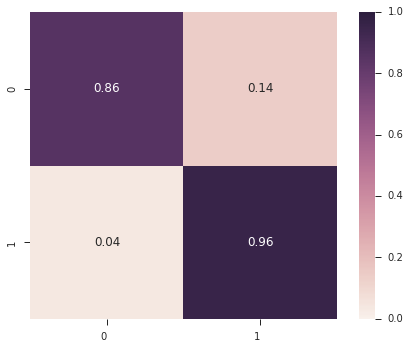

In [112]:
data = pd.read_csv("customers.csv")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(data['Channel'],(preds+1))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print "Confusion Matrix Actual Channel vs Segment Prediction"
ax = sns.heatmap(cm_norm,square=True,annot=True,fmt='.2f',vmin=0,vmax=1)
plt.xticks(rotation=0, ha='right');

print "Overall accuracy: {0:.1f}%".format(round(np.mean(data['Channel']==(preds+1)),3)*100)

**Answer:**

The clustering algorithm captures the structure of the data and the overall does a remarkable job aligning the data points.

A certain fuzziness in the actual data (with the Channel parameter included) was to be expected, as there is some overlap between the 2 categories, but by visual inspection is evident that it captures the basic aspect of it.

We can also take a look at the confusion matrix where we can have further proof of how well our clustering algorithm performed with an overall accuracy of 89.1%.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.